## Objetivo
O **objetivo** deste projeto é desenvolver um aplicativo que permita ao usuário adicionar uma marca d'água a uma imagem selecionada. O processo será implementado em Python, utilizando as bibliotecas CV2 e Gradio para o deployment.

### Passos
1. Carregar a imagem.
2. Redimensionar a imagem.
3. Converter a imagem para o espaço de cores RGB e depois para uma matriz (array).
4. Armazenar as dimensões da imagem.
5. Encontrar o centro da imagem.
6. Determinar a região onde o logotipo será inserido.
7. Combinar o logotipo com a imagem.
8. Adicionar o texto da marca d'água.
9. Utilizar o CV2 para configurar as propriedades do texto.
10. Converter a imagem de volta para o espaço de cores RGB e visualizá-la.

### Packages

In [1]:
!pip install --quiet pillow; # <- PIL

In [2]:
import cv2
import requests
import numpy as np
from PIL import Image
from io import BytesIO

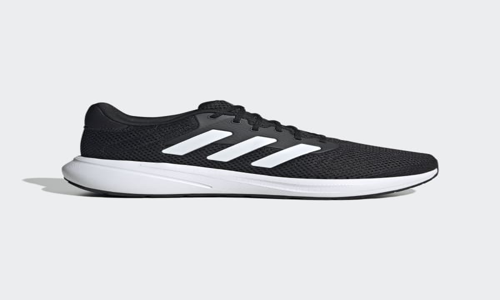

In [24]:
def load_resize_image(url_image: str, resize: tuple = None):
    """
    Loads an image from a given URL and optionally resizes it.

    Args:
    url_image (str): String containing the URL of the image.
    resize (tuple, optional): Tuple containing the new size of the image in the format (width, height). Defaults to None.

    Returns:
    Image (PNG/JPEG): The chosen image.
    """
    response = requests.get(url_image)
    image = Image.open(BytesIO(response.content))

    if resize:
        image = image.resize(resize)

    return image

url_image = "https://assets.adidas.com/images/w_600,f_auto,q_auto/32c151dc88224a6f93b1af1200ec5a6a_9366/Tenis_Response_Runner_Preto_ID7336_01_standard.jpg"
size = (500, 300)
image = load_resize_image(url_image, size)
image

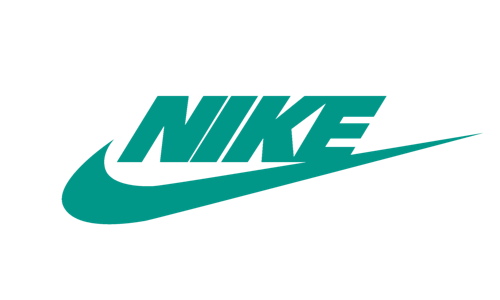

In [25]:
url_logo = "https://pngfre.com/wp-content/uploads/nike-logo-22-3-1024x1024.png"
size = (500, 300)
logo = load_resize_image(url_logo, size)
logo

array([[[236, 237, 239],
        [236, 237, 239],
        [236, 237, 239],
        ...,
        [236, 237, 239],
        [236, 237, 239],
        [236, 237, 239]],

       [[236, 237, 239],
        [236, 237, 239],
        [236, 237, 239],
        ...,
        [236, 237, 239],
        [236, 237, 239],
        [236, 237, 239]],

       [[236, 237, 239],
        [236, 237, 239],
        [236, 237, 239],
        ...,
        [236, 237, 239],
        [236, 237, 239],
        [236, 237, 239]],

       ...,

       [[236, 237, 239],
        [236, 237, 239],
        [236, 237, 239],
        ...,
        [236, 237, 239],
        [236, 237, 239],
        [236, 237, 239]],

       [[236, 237, 239],
        [236, 237, 239],
        [236, 237, 239],
        ...,
        [236, 237, 239],
        [236, 237, 239],
        [236, 237, 239]],

       [[236, 237, 239],
        [236, 237, 239],
        [236, 237, 239],
        ...,
        [236, 237, 239],
        [236, 237, 239],
        [236, 237, 239]]], dtype=uint8)
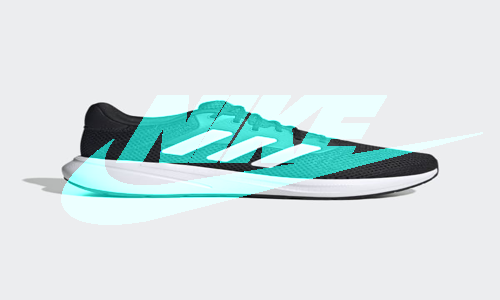

In [26]:
# Extrair altura e largaura da imagem
def extract_dimenstions(rgb_image, rgb_logo):
    height_image, width_image, _ = rgb_image.shape
    height_logo, width_logo, _ = rgb_logo.shape
    return height_image, width_image, height_logo, width_logo

# Retornar os valores da altura e largura
def image_to_rgb(image=image, logo=logo):
    rgb_image = np.array(image.convert("RGB"))
    rgb_logo = np.array(logo.convert("RGB"))
    height_image, width_image, height_logo, width_logo = extract_dimenstions(rgb_image, rgb_logo)
    return  rgb_image, rgb_logo, height_image, width_image, height_logo, width_logo

# Localizar centro da imagem
def get_center_image(image=image, logo=logo):
    rgb_image, rgb_logo, height_image, width_image, height_logo, width_logo = image_to_rgb(image=image, logo=logo)

    center_y = int(height_image/2)
    center_x = int(width_image/2)
    top_y = center_y - int(height_logo/2)
    left_x = center_x - int(width_logo/2)
    bottom_y = top_y + height_image
    right_x = left_x + width_logo

    return rgb_image, rgb_logo, center_y, center_x, top_y, left_x, bottom_y, right_x

def region_of_interest(image, logo):
    rgb_image, rgb_logo, center_y, center_x, top_y, left_x, bottom_y, right_x = get_center_image(image, logo)
    roi = rgb_image[top_y: bottom_y, left_x: right_x]
    result = cv2.addWeighted(roi, 1, rgb_logo, 1, 0)
    return result

region_of_interest(image, logo)


### Guides

<br>

- Google Style Guide - [Arja](https://www.youtube.com/watch?v=woIkysZytSs&t=123s)


- Python Requests - [W3S](https://www.w3schools.com/python/ref_requests_get.asp)

- Coding Practices - [Medium](https://medium.com/bitgrit-data-science-publication/8-coding-practices-for-data-scientists-2db7fa34bf76)

- io - [Python Official Documentation](https://docs.python.org/3/library/io.html)